In [20]:
import json
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
json_path = './data/instances_default.json'

with open(json_path, 'r', encoding='utf-8') as j:
    json_data = json.load(j)
    
print(type(json_data))
print(json_data)
print(json_data['categories'])
print(json_data['images'])
print(json_data['annotations'])

<class 'dict'>
{'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}], 'images': [{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]}
[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]
[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '',

In [9]:
categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

print(images_info)
print(annotations_info)

label_dict = {1:'cat', 2:'dog'}

[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


좌표:  468 92 171 248
dog
yolo좌표:  0.86484375 0.45 0.2671875 0.5166666666666667
01
좌표:  3 183 200 214
dog
yolo좌표:  0.1609375 0.6041666666666666 0.3125 0.44583333333333336
01


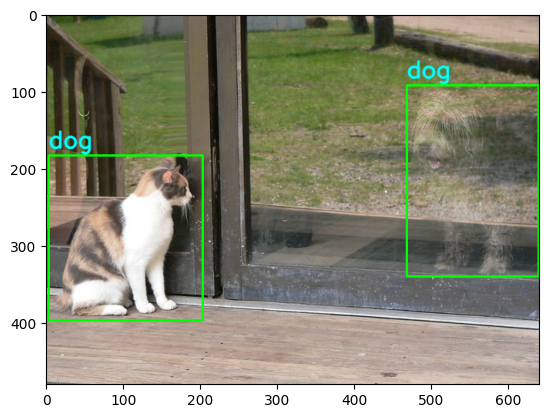

In [29]:
# json 시각화
for image_json in images_info:
    #print(image_json)
    file_name = image_json['file_name']
    image_path = os.path.join('./data', file_name)
    image_id = image_json['id']
    #print(image_path)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # image size
    img_height, img_width, img_channel = img.shape
    
    # bbox info
    for annotation in annotations_info:
        if image_id == annotation['image_id']:
            bbox = annotation['bbox']
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            print('좌표: ', x,y,w,h)
            
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
            
            category_id = annotaion['category_id']
            label_name = label_dict[category_id]
            print(label_name)
            
            img = cv2.putText(img, label_name, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2, cv2.LINE_AA)
            
            # yolo 좌표값으로 변경하기
            center_x = ((2*x+w)/(2*img_width))
            center_y = ((2*y+h)/(2*img_height))
            yolo_w = w/img_width
            yolo_h = h/img_height
            print('yolo좌표: ', center_x, center_y, yolo_w, yolo_h)
            
            # yolo 파일 저장
            file_name_temp = file_name.replace('.jpg','')
            print(file_name_temp)
            
        with open(f"./data/{file_name_temp}.txt", "a") as f:
            f.write(f"{label_name} {center_x} {center_y} {yolo_w} {yolo_h} \n")
            
    plt.imshow(img)
    plt.show()